<a href="https://colab.research.google.com/github/hbedros/nyc-taxi/blob/main/Haig_Bedros_07_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

In this section, please describe the dataset you are using.  Include a link to the source of this data.  You should also provide some explanation on why you choose this dataset.

got my dataset from Kaggle.com on Taxi trip data NYC: https://www.kaggle.com/datasets/anandaramg/taxi-trip-data-nyc

This NYC Taxi Data is a rich dataset that contains detailed information about taxi trips, including pickup and dropoff times, locations, distances, fares, and additional charges. It is interesting because it allows for in-depth analysis of urban transportation patterns, which can lead to insights into traffic flow, peak travel times, and the economic aspects of taxi services. By analyzing this dataset, one can identify trends, inform policy decisions for urban planning, or improve transportation services, making it valuable for anyone interested in urban data science or the logistics of transportation systems.

______________
# Data Exploration
Import your dataset into your .ipynb, create dataframes, and explore your data.  

Include:

* Summary statistics means, medians, quartiles,
* Missing value information
* Any other relevant information about the dataset.  



In [7]:
import pandas as pd

# Load the dataset from the provided URL
url = "https://raw.githubusercontent.com/hbedros/nyc-taxi/main/taxi_tripdata.csv"
data = pd.read_csv(url, low_memory=False)

In [8]:
# Display summary statistics of the dataset
summary_statistics = data.describe()

# Displaying means, medians, quartiles
means = summary_statistics.loc['mean']
medians = data.median()
quartiles = summary_statistics.loc[['25%', '50%', '75%']]

# Missing value information
missing_values = data.isnull().sum()

summary_statistics, means, medians, quartiles, missing_values

<ipython-input-8-62a43762d748>:6: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  medians = data.median()


(           VendorID    RatecodeID  PULocationID  DOLocationID  \
 count  51173.000000  51173.000000  83691.000000  83691.000000   
 mean       1.851113      1.159244    108.362572    133.270005   
 std        0.355981      0.773260     70.370170     77.216791   
 min        1.000000      1.000000      3.000000      1.000000   
 25%        2.000000      1.000000     56.000000     69.000000   
 50%        2.000000      1.000000     75.000000    132.000000   
 75%        2.000000      1.000000    166.000000    205.000000   
 max        2.000000      5.000000    265.000000    265.000000   
 
        passenger_count  trip_distance   fare_amount         extra  \
 count     51173.000000   83691.000000  83691.000000  83691.000000   
 mean          1.307858     194.354699     20.388305      1.156707   
 std           0.984362    4405.549221     15.583552      1.367897   
 min           0.000000       0.000000   -150.000000     -4.500000   
 25%           1.000000       1.350000      9.000000  

# Data Wrangling
Create a subset of your original data and perform the following.  

1. Modify multiple column names.

2. Look at the structure of your data – are any variables improperly coded? Such as strings or characters? Convert to correct structure if needed.

3. Fix missing and invalid values in data.

4. Create new columns based on existing columns or calculations.

5. Drop column(s) from your dataset.

6. Drop a row(s) from your dataset.

7. Sort your data based on multiple variables.

8. Filter your data based on some condition.

9. Convert all the string values to upper or lower cases in one column.

10. Check whether numeric values are present in a given column of your dataframe.

11. Group your dataset by one column, and get the mean, min, and max values by group.
  * Groupby()
  * agg() or .apply()

12. Group your dataset by two columns and then sort the aggregated results within the groups.

**You are free (and should) to add on to these questions.  Please clearly indicate in your assignment your answers to these questions.**

In [10]:
# Task 1: Modify multiple column names for clarity
data.rename(columns={
    'lpep_pickup_datetime': 'pickup_datetime',
    'lpep_dropoff_datetime': 'dropoff_datetime'
}, inplace=True)

In [11]:
# Task 2: Convert datetime columns to the correct format
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data['dropoff_datetime'] = pd.to_datetime(data['dropoff_datetime'])

In [12]:
# Task 3: Fix missing and invalid values (example: filling missing 'tip_amount' with 0)
data['tip_amount'].fillna(0, inplace=True)

In [13]:
# Task 4: Create new columns based on existing ones (example: trip duration)
data['trip_duration'] = (data['dropoff_datetime'] - data['pickup_datetime']).dt.total_seconds() / 60

In [14]:
# Task 5: Drop unnecessary columns (example: 'VendorID' if not needed)
data.drop(columns=['VendorID'], inplace=True)

In [15]:
# Task 6: Drop rows with zero passengers as they are not valid trips
data = data[data['passenger_count'] > 0]

In [16]:
# Task 7: Sort data by pickup datetime and total amount
data.sort_values(by=['pickup_datetime', 'total_amount'], inplace=True)

In [17]:
# Task 8: Filter data to remove outlier trips (example: trips over 100 miles)
data = data[data['trip_distance'] <= 100]

In [18]:
# Task 9: Convert string values to uppercase for consistency (example: 'store_and_fwd_flag')
data['store_and_fwd_flag'] = data['store_and_fwd_flag'].str.upper()

In [19]:
# Task 10: Ensure 'fare_amount' is numeric
data['fare_amount'] = pd.to_numeric(data['fare_amount'], errors='coerce')

In [20]:
# Task 11: Group data by 'payment_type' and calculate average fare and tip
grouped_data = data.groupby('payment_type').agg({'fare_amount': 'mean', 'tip_amount': 'mean'})

In [21]:
# Task 12: Group data by 'trip_type' and 'RatecodeID', then sort within groups by total amount
grouped_sorted = data.groupby(['trip_type', 'RatecodeID']).agg({'total_amount': 'mean'}).sort_values(by=['trip_type', 'total_amount'], ascending=[True, False])

# **Assignment 7**

# **Weeks 8 & 9 - Pandas**
* In this homework assignment, you will explore and analyze a public dataset of your choosing. Since this assignment is “open-ended” in nature, you are free to expand upon the requirements below. However, you must meet the minimum requirments as indicated in each section.

* You must use Pandas as the **primary tool** to process your data.

* The preferred method for this analysis is in a .ipynb file. Feel free to use whichever platform of your choosing.  
 * https://www.youtube.com/watch?v=inN8seMm7UI (Getting started with Colab).

* Your data should need some "work", or be considered "dirty".  You must show your skills in data cleaning/wrangling.

### **Some data examples:**
•	https://www.data.gov/

•	https://opendata.cityofnewyork.us/

•	https://datasetsearch.research.google.com/

•	https://archive.ics.uci.edu/ml/index.php

### **Resources:**

•	https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html

•	https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html


### **Headings or comments**
**You are required to make use of comments, or headings for each section.  You must explain what your code is doing, and the results of running your code.**  Act as if you were giving this assignment to your manager - you must include clear and descriptive information for each section.

### **You may work as a group or indivdually on this assignment.**


In [ ]:
# Display final summary statistics for cleaned data
final_summary_statistics = data.describe()
print("Final Summary Statistics:")
display(final_summary_statistics)  # This will display the DataFrame as a formatted table

# Display missing values after cleaning
final_missing_values = data.isnull().sum()
print("\nMissing Values after Cleaning:")
display(final_missing_values.to_frame('Missing Values'))  # Converts the Series to a DataFrame for table display

# Display the first few rows of the cleaned dataset to give a snapshot of the data
print("\nCleaned Data Snapshot:")
display(data.head())  # Displays the first few rows of the DataFrame as a table

# Display key insights from grouped data
print("\nAverage Fare and Tip Amount by Payment Type:")
display(grouped_data)  # Assuming 'grouped_data' is a DataFrame

# Display sorted grouped data for a quick insight into trip types and rate codes
print("\nAverage Total Amount by Trip Type and RatecodeID:")
display(grouped_sorted.head())  # Assuming 'grouped_sorted' is a DataFrame

# Note: The 'display()' function is used in Jupyter Notebooks to render DataFrames as HTML tables


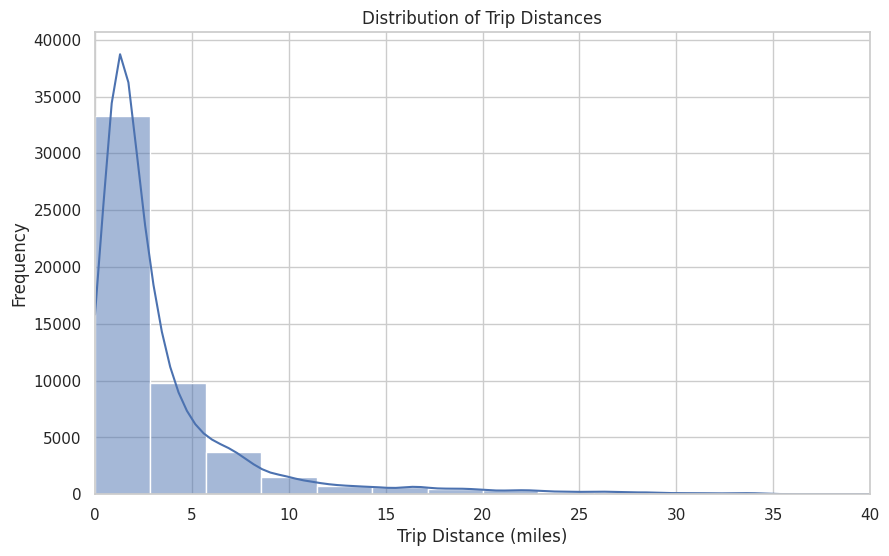

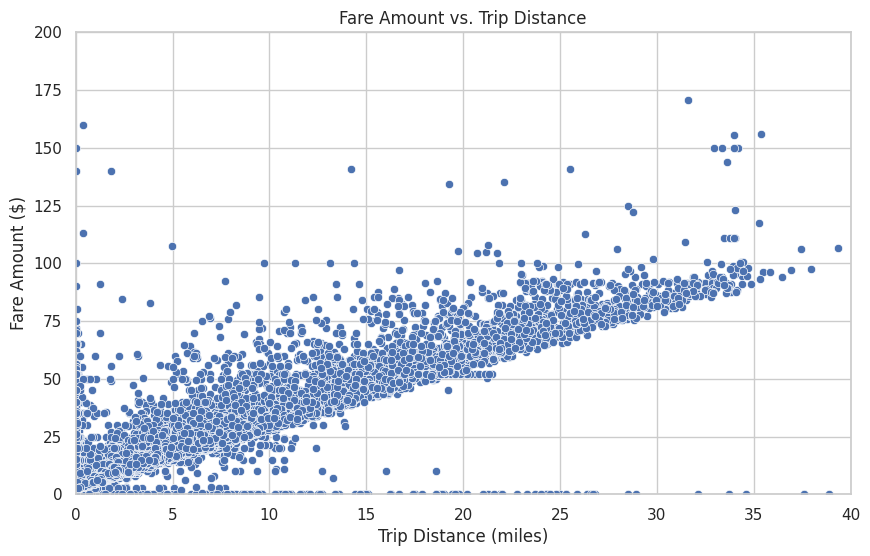

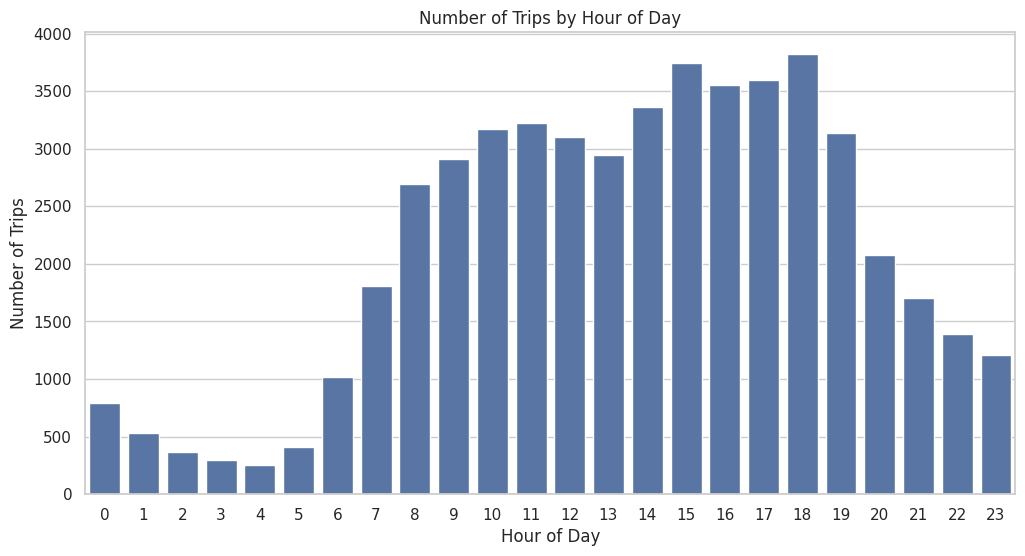

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visual style of seaborn for better visuals
sns.set(style="whitegrid")

# Assuming 'data' is your cleaned DataFrame

# Analysis 1: Trip Distance Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x="trip_distance", bins=30, kde=True)
plt.title('Distribution of Trip Distances')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Frequency')
plt.xlim(0, 40)  # Limiting to 40 miles for better clarity, adjust as needed
plt.show()

# Analysis 2: Relationship between Fare Amount and Trip Distance
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="trip_distance", y="fare_amount")
plt.title('Fare Amount vs. Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.xlim(0, 40)  # Limiting for clarity
plt.ylim(0, 200)  # Adjust as needed
plt.show()

# Analysis 3: Hourly Trip Patterns
# Extract hour from pickup datetime
data['pickup_hour'] = data['pickup_datetime'].dt.hour
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x="pickup_hour")
plt.title('Number of Trips by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.show()


# Conclusions  

After exploring your dataset, provide a short summary of what you noticed from this dataset.  What would you explore further with more time?

In conclusion, here are the observations from the graphs:

1. The **Distribution of Trip Distances** graph shows that the majority of trips are short, predominantly less than 5 miles, suggesting that taxi services are commonly used for brief, local travel. There's a sharp decrease in frequency as the distance increases, indicating long-distance trips are much less common.

2. The **Fare Amount vs. Trip Distance** scatter plot indicates a positive correlation between trip distance and fare amount, as expected. Nonetheless, there's noticeable variability in fares for trips of similar lengths, hinting at other influencing factors like traffic conditions, varied routes, or different times of day affecting the cost.

3. The **Number of Trips by Hour of Day** bar chart presents a cyclical pattern in taxi usage, with peaks during typical commuting hours in the morning and evening. There's a marked dip in the early morning hours, reflecting lower demand for taxi services overnight.

These visualizations collectively offer valuable insights into the operation and usage patterns of taxi services in NYC.

If we had more time here are three areas that would be great to explore further:

1. **Looking at Rides Over Time**: It'd be interesting to see if more people take taxis on weekends or during holiday seasons. We could check if there's a pattern, like if people tend to grab a cab more often when it's cold or during certain events in the city.

2. **Mapping Out the Trips**: If we could see where most people are going, it might tell us which areas are hotspots for taxis. We could also figure out if some neighborhoods might need more taxis around.

3. **Predicting Taxi Fares**: By looking at things like how far the trip is and what time it is, we might be able to guess how much the ride will cost. This could help riders know what to expect to pay and taxis to set fair prices.

These would help us understand when and where taxis are needed most, and how much people might pay for a ride.